In [1]:

!wget -c -4 https://www.ncc.unesp.br/datatrieste2025/LC09_L2SP_191026_20250618_20250621_02_T1_SR_B4.TIF
!wget -c -4 https://www.ncc.unesp.br/datatrieste2025/LC09_L2SP_191026_20250618_20250621_02_T1_SR_B5.TIF
!wget -c -4 https://www.ncc.unesp.br/datatrieste2025/T32TQM_20250809T100041_B08_10m.jp2
!wget -c -4 https://www.ncc.unesp.br/datatrieste2025/T32TQM_20250809T100041_B04_10m.jp2
!wget -c -4 https://www.ncc.unesp.br/datatrieste2025/Statistische_Bezirke_20250428.shp
!wget -c -4 https://www.ncc.unesp.br/datatrieste2025/Statistische_Bezirke_20250428.shx

--2025-08-14 02:17:21--  https://www.ncc.unesp.br/datatrieste2025/LC09_L2SP_191026_20250618_20250621_02_T1_SR_B4.TIF
Resolving www.ncc.unesp.br (www.ncc.unesp.br)... 200.145.46.8
Connecting to www.ncc.unesp.br (www.ncc.unesp.br)|200.145.46.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90328278 (86M) [image/tiff]
Saving to: ‘LC09_L2SP_191026_20250618_20250621_02_T1_SR_B4.TIF’

LC09_L2SP_191026_20 100%[===================>]  86.14M  20.6MB/s    in 5.2s    

2025-08-14 02:17:28 (16.6 MB/s) - ‘LC09_L2SP_191026_20250618_20250621_02_T1_SR_B4.TIF’ saved [90328278/90328278]

--2025-08-14 02:17:29--  https://www.ncc.unesp.br/datatrieste2025/LC09_L2SP_191026_20250618_20250621_02_T1_SR_B5.TIF
Resolving www.ncc.unesp.br (www.ncc.unesp.br)... 200.145.46.8
Connecting to www.ncc.unesp.br (www.ncc.unesp.br)|200.145.46.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99992275 (95M) [image/tiff]
Saving to: ‘LC09_L2SP_191026_20250618_20250621_02_T1

In [2]:
!mkdir -p "data/"
!mv *.jp2 data/
!mv *.TIF data/

In [3]:
pip install geopandas folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 46.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 14.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# ============================================
# LIBRARY IMPORTS FOR URBAN DATA SCIENCE
# ============================================

# Basic Data Handling and Analysis
import pandas as pd       # For handling tabular data (CSV, Excel, DataFrames)
import numpy as np        # For numerical operations and array manipulation

# Geospatial Data Processing
import geopandas as gpd   # Extends pandas with support for geospatial data (shapefiles, GeoJSON)
from shapely.geometry import Point, Polygon  # For handling geometric objects like points, lines, polygons

# Mapping & Visualization
import matplotlib.pyplot as plt     # For standard plotting (line plots, bar charts, etc.)
import seaborn as sns               # For advanced statistical plots (heatmaps, correlation)
import folium                       # For interactive web-based maps (Leaflet.js)

# Raster Data (for remote sensing and surface analysis)
!pip install rasterio
import rasterio                     # For reading and manipulating raster (satellite) data
from rasterio.plot import show     # Quick display of raster data

# Date-Time Handling
import datetime                    # Useful for working with time-based trends (e.g., population over years)

# File Operations and System
import os                          # For working with file paths and directories



# Confirmation Message
print("All essential libraries have been imported successfully")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 47.4 MB/s eta 0:00:00:00:0100:01
All essential libraries have been imported successfully


## NDVI (Normalized Difference Vegetation Index)
NDVI is one of the most widely used spatial indices in remote sensing — perfect for assessing vegetation health, urban greening, and land cover classification.

NDVI = (NIR - Red) / (NIR + Red)

| Band | Sentinel-2 Index | Purpose                              |
| ---- | ---------------- | ------------------------------------ |
| NIR  | **Band 8**       | Reflects healthy vegetation strongly |
| Red  | **Band 4**       | Absorbed by chlorophyll              |


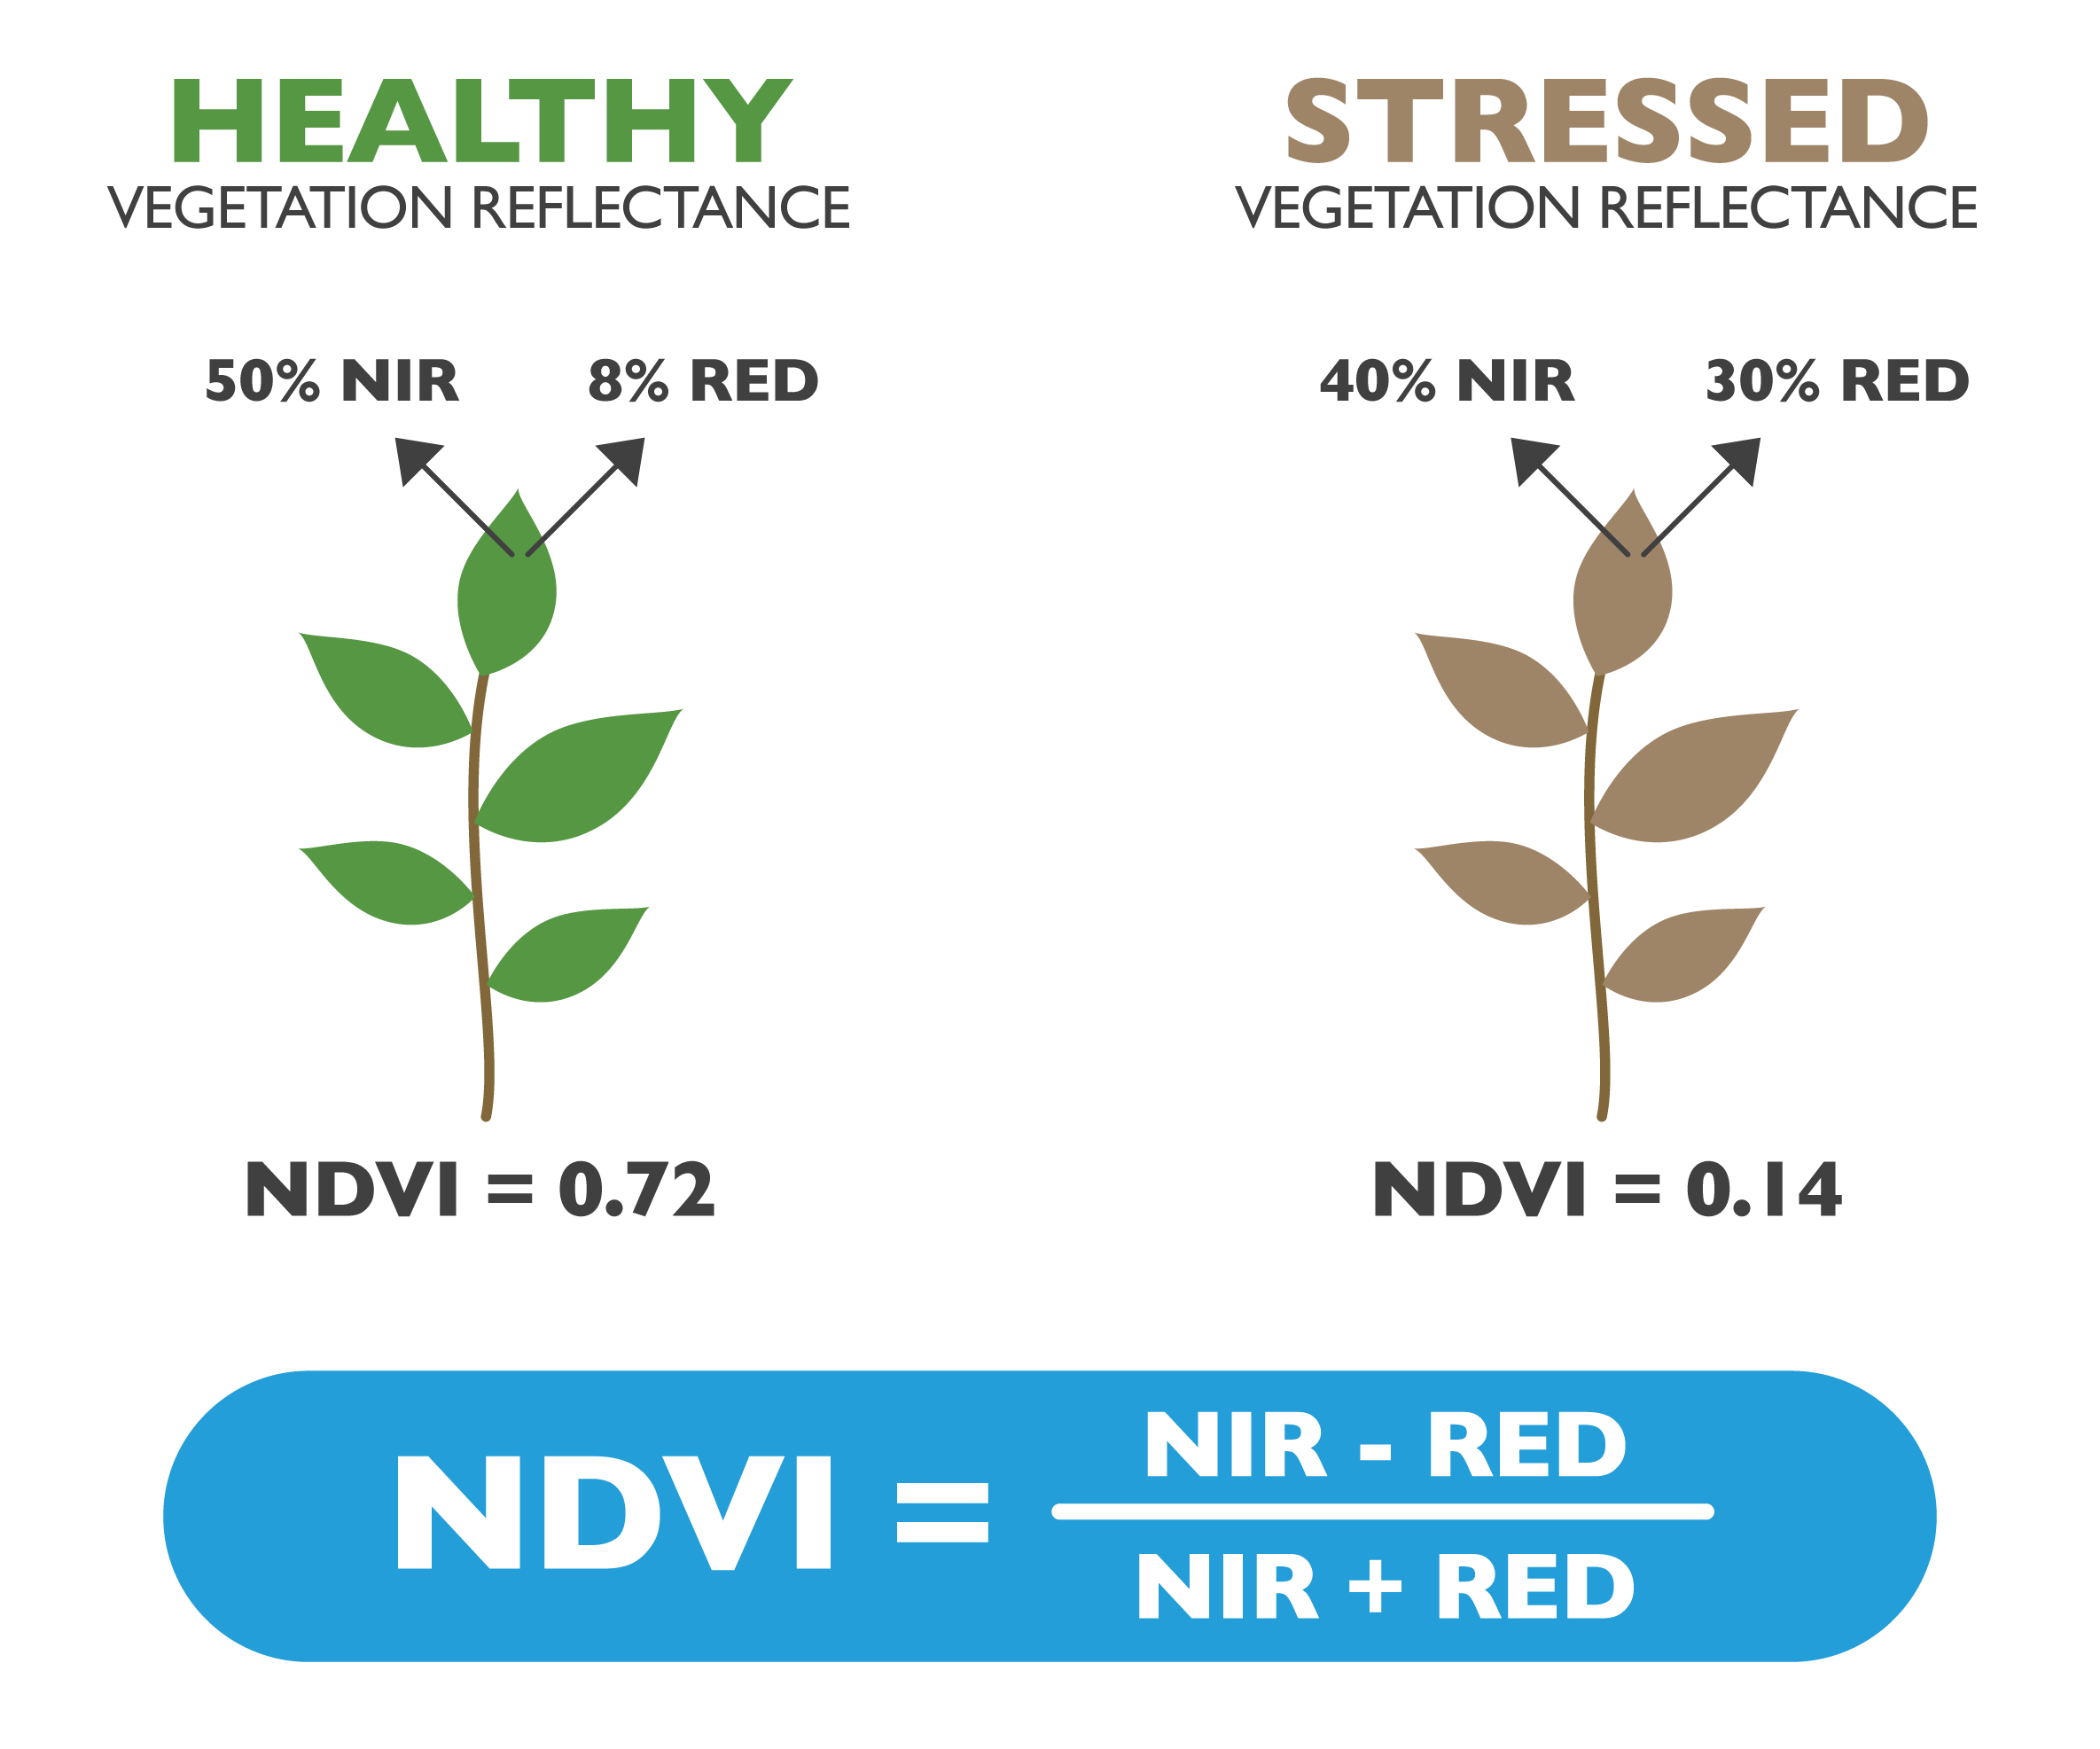

Image Source: EOS Data Analytics (AgriTech)

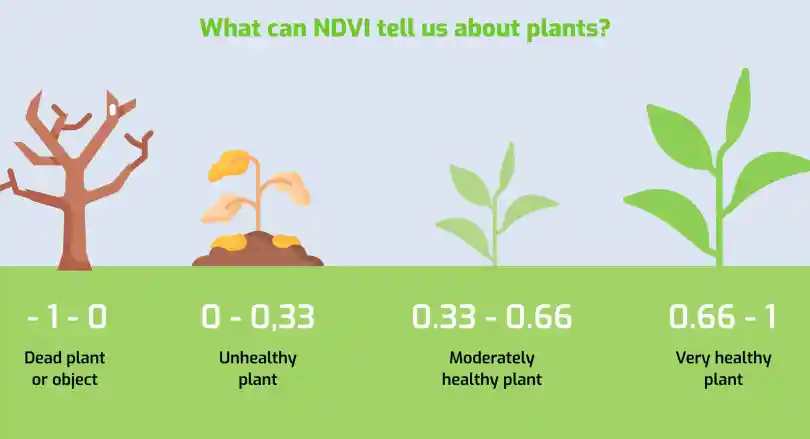

Image Source: NASA ARSET & GISGeography  

Now Lets calculate NDVI for Sentinel Imagery


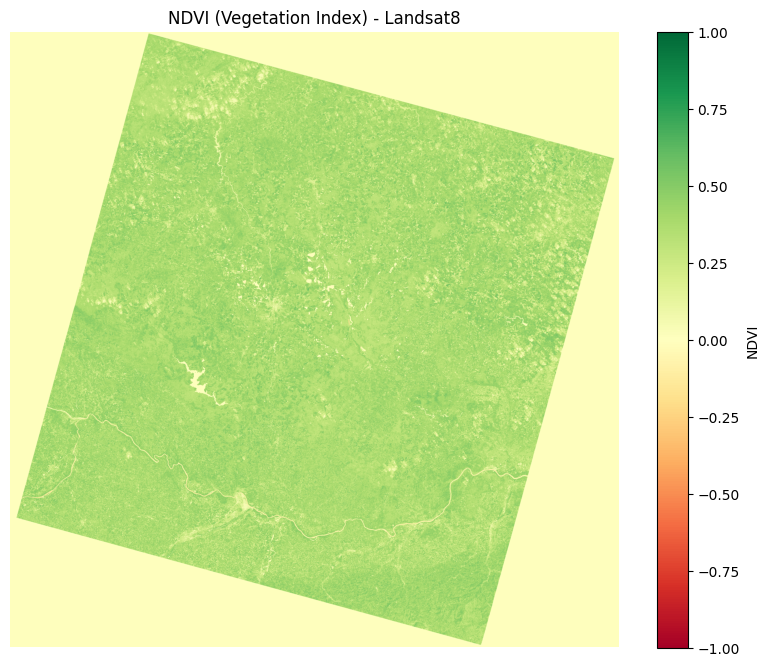

In [6]:
import numpy as np            # for array math
import rasterio               # for reading GeoTIFFs
import matplotlib.pyplot as plt  # for plotting
# Load Band 8 (NIR) and Band 4 (Red)
b8_path = r"data/LC09_L2SP_191026_20250618_20250621_02_T1_SR_B5.TIF"  # NIR
b4_path = r"data/LC09_L2SP_191026_20250618_20250621_02_T1_SR_B4.TIF"  # Red

# Open both bands
with rasterio.open(b8_path) as nir_src:
    nir = nir_src.read(1).astype('float32')

with rasterio.open(b4_path) as red_src:
    red = red_src.read(1).astype('float32')
    transform = red_src.transform
    crs = red_src.crs

# Avoid division by zero using np.seterr
np.seterr(divide='ignore', invalid='ignore')

# Compute NDVI
ndvi = (nir - red) / (nir + red)

# Set values to nan where undefined
ndvi[np.isnan(ndvi)] = 0

# Plot NDVI
plt.figure(figsize=(10, 8))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title("NDVI (Vegetation Index) - Landsat8")
plt.axis("off")
plt.show()

In [16]:
from shapely.geometry import mapping
from rasterio.mask import mask

# Load vector data
vector_path  = r"Statistische_Bezirke_20250428.shp"
gdf = gpd.read_file(vector_path)

if gdf.crs != crs:
    gdf = gdf.to_crs(crs)

# Convert GeoDataFrame geometries to GeoJSON format
geoms = [mapping(geom) for geom in gdf.geometry]

# Function to clip a raster band using vector geometry
def clip_band(band_path):
    with rasterio.open(band_path) as src:
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()
        out_meta.update({
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })
    return out_image[0].astype('float32'), out_transform

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

| NDVI Value Range | Meaning                     |
| ---------------- | --------------------------- |
| \~ 0.6 to 1.0    | Dense healthy vegetation    |
| \~ 0.2 to 0.5    | Sparse vegetation/grass     |
| \~ 0 to 0.2      | Barren or urban surfaces    |
| < 0              | Water, shadows, snow, cloud |

In [ ]:
nir_clipped, _ = clip_band(b8_path)
red_clipped, _ = clip_band(b4_path)

In [ ]:
def normalize(band):
    min_val, max_val = np.percentile(band, (2, 98))
    return np.clip((band - min_val) / (max_val - min_val), 0, 1)

nir = normalize(nir_clipped)
r = normalize(red_clipped)

In [ ]:
# Calculate NDVI
ndvi = (nir - r) / (nir + r)

# Handle any divide-by-zero or NaN
ndvi = np.nan_to_num(ndvi)

# Plot the NDVI
plt.figure(figsize=(10, 8))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title("NDVI (Normalized Difference Vegetation Index)", fontsize=14)
plt.axis("off")
plt.show()

In [ ]:
pip install pymp-pypi

In [11]:
import os
import numpy as np
import pymp
import rasterio
from rasterio.windows import Window



# Discover raster metadata once (main process)
with rasterio.open(b4_path) as r4:
    H, W = r4.height, r4.width
    src_transform = r4.transform
    src_crs = r4.crs
    src_profile = r4.profile.copy()

out_dir = "ndvi_stripes_pymp"
os.makedirs(out_dir, exist_ok=True)

# Choose number of processes (threads in pymp terms). Adjust to your cores.
N_THREADS = os.cpu_count() or 4

with pymp.Parallel(N_THREADS) as p:
    # Partition by rows across threads
    rows_per = (H + p.num_threads - 1) // p.num_threads
    r0 = p.thread_num * rows_per
    r1 = min(H, r0 + rows_per)
    if r0 < r1:
        # Each process opens its own readers (safe; separate processes)
        with rasterio.open(b4_path) as r4, rasterio.open(b8_path) as r8:
            win = Window(col_off=0, row_off=r0, width=W, height=r1 - r0)

            b4 = r4.read(1, window=win).astype(np.float32)
            b8 = r8.read(1, window=win).astype(np.float32)

            # NDVI = (NIR - RED) / (NIR + RED) with zero-safe division
            denom = b8 + b4
            ndvi = np.where(denom != 0.0, (b8 - b4) / denom, 0.0).astype(np.float32)

            stripe_transform = rasterio.windows.transform(win, src_transform)

            out_path = os.path.join(
                out_dir,
                f"ndvi_stripe_t{p.thread_num:04d}_rows{r0}-{r1-1}.tif"
            )

            profile = src_profile.copy()
            profile.update(
                driver="GTiff",
                width=W,
                height=r1 - r0,
                count=1,
                dtype="float32",
                transform=stripe_transform,
                crs=src_crs,
                nodata=np.float32(0.0),   # or keep valid NDVI & add mask band
                tiled=True,
                blockxsize=512,
                blockysize=512,
                compress="deflate",
                predictor=3,               # float predictor
                BIGTIFF="IF_SAFER",
            )

            with rasterio.open(out_path, "w", **profile) as dst:
                dst.write(ndvi, 1)

In [12]:
import glob
import rasterio
from rasterio.merge import merge

stripe_paths = sorted(glob.glob("ndvi_stripes_pymp/ndvi_stripe_*.tif"))
assert stripe_paths, "No stripe files found in ndvi_stripes_pymp/"

srcs = [rasterio.open(p) for p in stripe_paths]
mosaic, out_transform = merge(srcs, method="first")  # (1, H, W)
meta = srcs[0].meta.copy()
for s in srcs:
    s.close()

meta.update(
    height=mosaic.shape[1],
    width=mosaic.shape[2],
    transform=out_transform,
    count=1,
    dtype="float32",
    driver="GTiff",
    tiled=True,
    blockxsize=512,
    blockysize=512,
    compress="deflate",
    predictor=3,
    BIGTIFF="IF_SAFER",
    nodata=np.float32(0.0),
)

mosaic_path = "ndvi_mosaic_pymp.tif"
with rasterio.open(mosaic_path, "w", **meta) as dst:
    dst.write(mosaic[0], 1)

print(f"Wrote mosaic: {mosaic_path}")


Wrote mosaic: ndvi_mosaic_pymp.tif


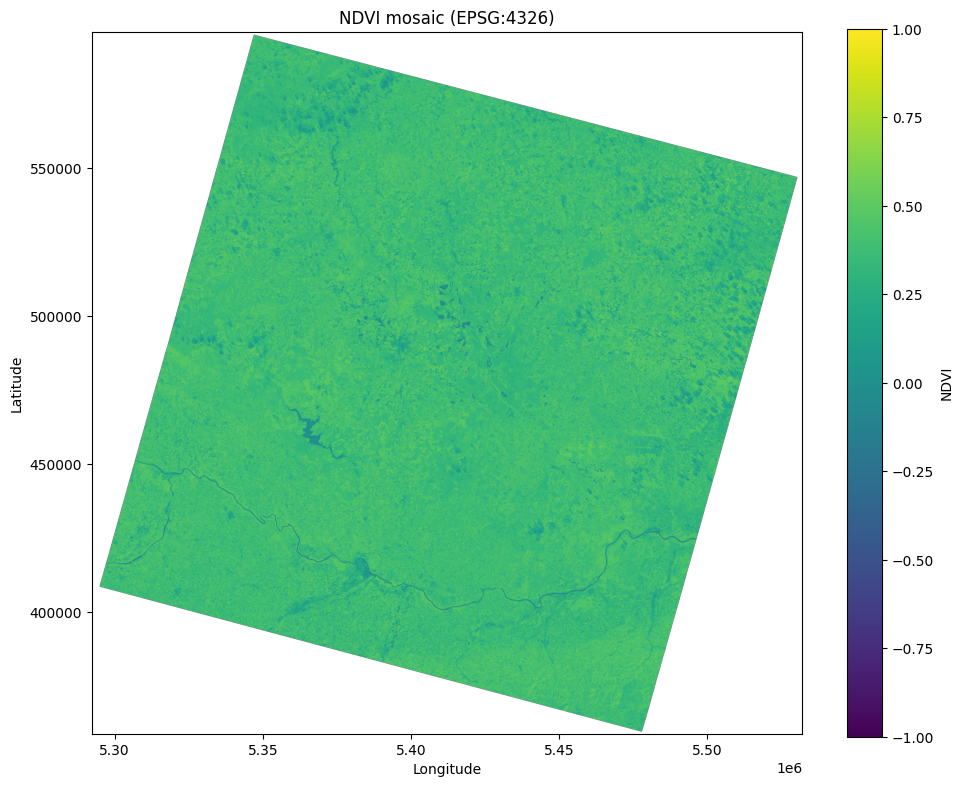

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import array_bounds

# Optional vector overlays (set paths if you have them)
buildings_path = None      # e.g., "data/buildings.geojson"
admin_boundaries_path = None  # e.g., "data/admin.gpkg"

src_path = "ndvi_mosaic_pymp.tif"  # from the reprojection step

with rasterio.open(src_path) as src:
    ndvi = src.read(1).astype(np.float32)
    ndvi = np.where(ndvi == 0.0, np.nan, ndvi)  # hide nodata if you kept 0.0
    H, W = src.height, src.width
    ymin, xmin, ymax, xmax = array_bounds(H, W, src.transform)  # lat/lon bounds

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(
    ndvi,
    extent=(xmin, xmax, ymin, ymax),
    origin="upper",
    vmin=-1, vmax=1
)
cb = plt.colorbar(im, ax=ax, label="NDVI")
ax.set_title("NDVI mosaic (EPSG:4326)")

# ---- Optional: overlay vectors if you have them ----
try:
    import geopandas as gpd
    if buildings_path:
        bld = gpd.read_file(buildings_path)
        bld = bld.to_crs("EPSG:4326")
        bld.plot(ax=ax, linewidth=0.8, edgecolor="black", facecolor="none", label="Buildings")
    if admin_boundaries_path:
        adm = gpd.read_file(admin_boundaries_path)
        adm = adm.to_crs("EPSG:4326")
        adm.plot(ax=ax, linewidth=1.0, edgecolor="blue", facecolor="none", label="Admin Boundaries")

    if buildings_path or admin_boundaries_path:
        # simple legend handles
        handles = []
        if buildings_path:
            handles.append(plt.Line2D([0],[0], color='black', lw=2, label='Buildings'))
        if admin_boundaries_path:
            handles.append(plt.Line2D([0],[0], color='blue',  lw=2, label='Admin Boundaries'))
        ax.legend(handles=handles, loc="lower right")
except Exception as e:
    print(f"(Vector overlay skipped: {e})")

ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude")
plt.tight_layout(); plt.show()


Found 40 stripes.


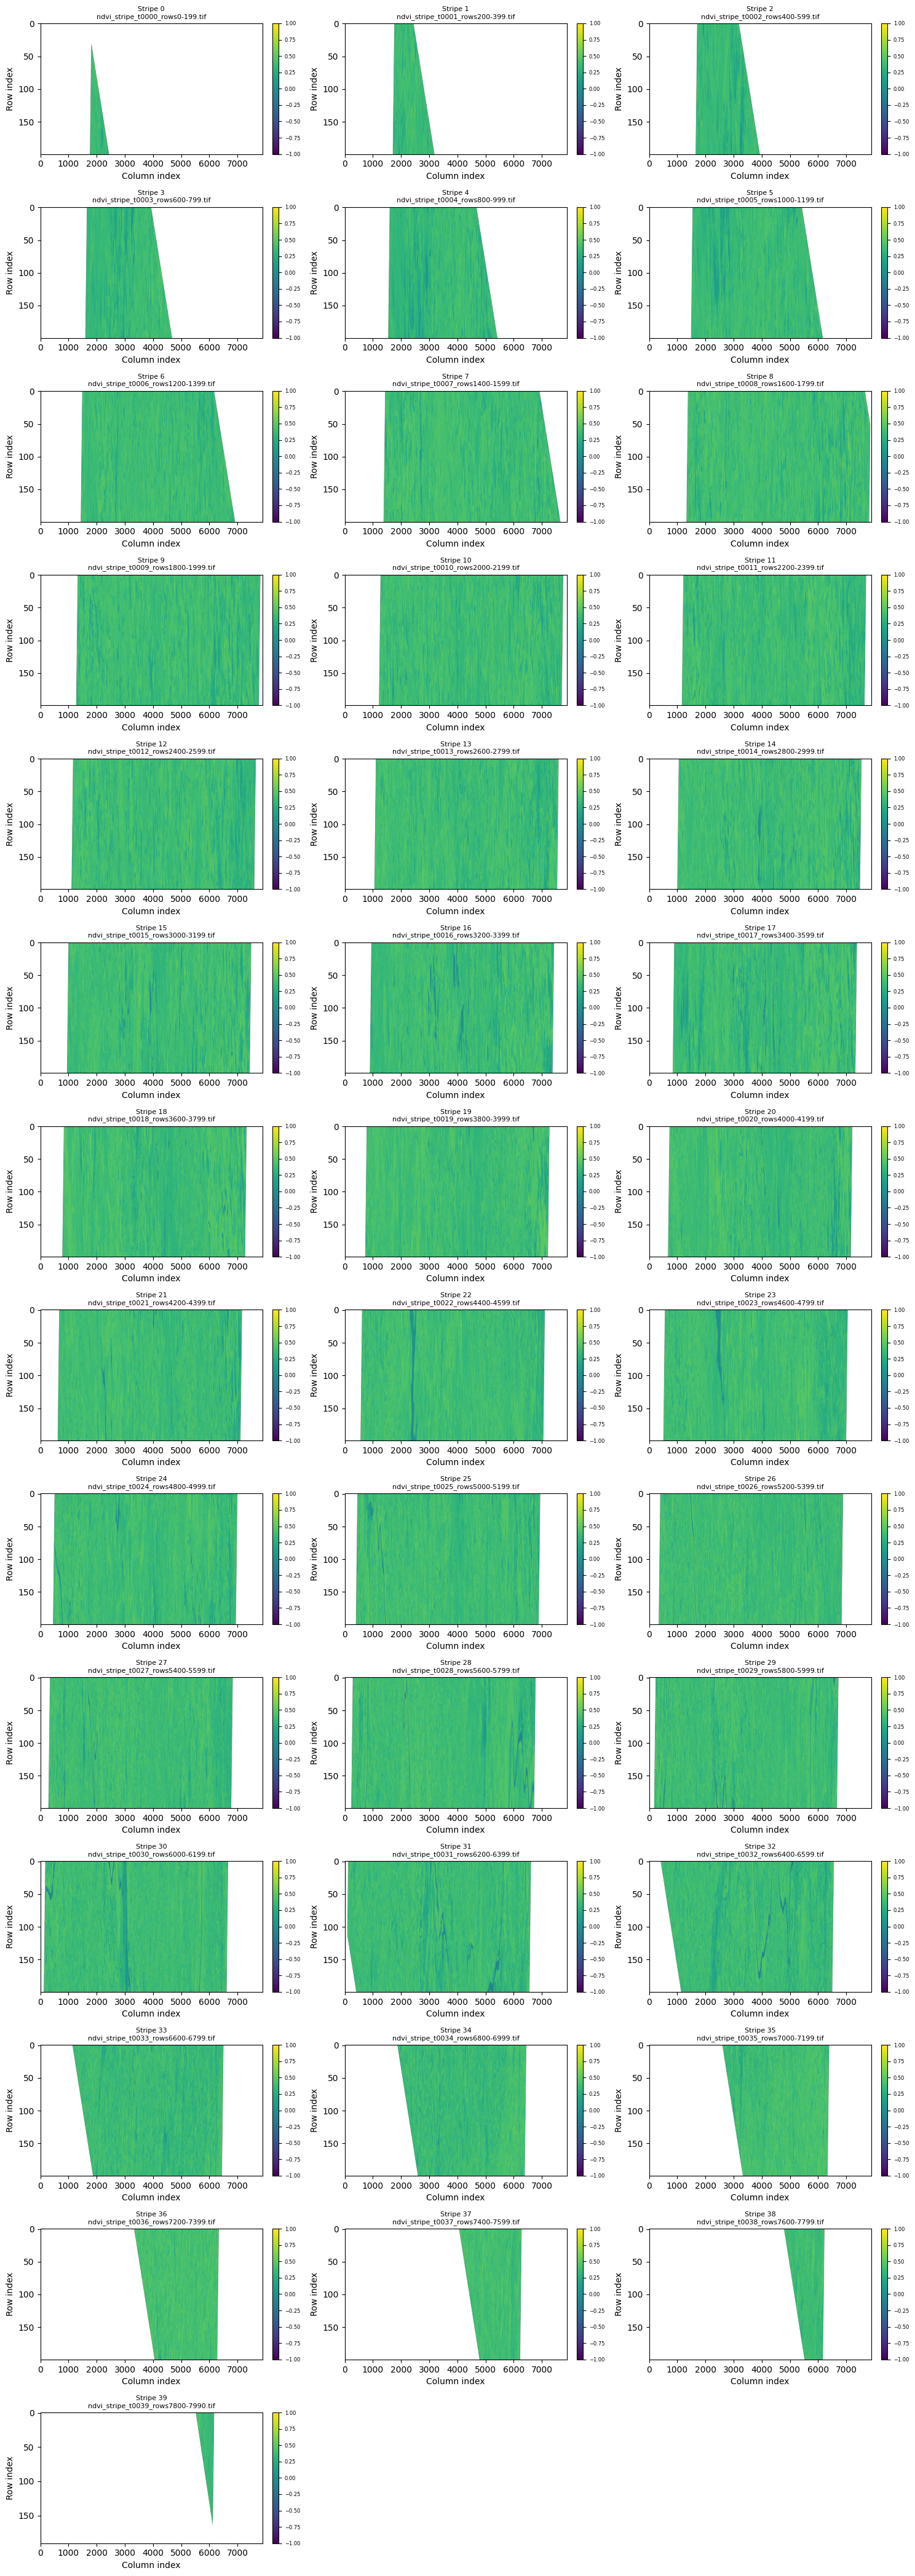

In [14]:
import glob
import math
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio

stripe_dir = "ndvi_stripes_pymp"
stripe_paths = sorted(glob.glob(f"{stripe_dir}/*.tif"))

if not stripe_paths:
    raise FileNotFoundError(f"No .tif stripes found in {stripe_dir}")

print(f"Found {len(stripe_paths)} stripes.")

# Decide subplot grid size
n_stripes = len(stripe_paths)
cols = 3  # adjust for layout
rows = math.ceil(n_stripes / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3*rows))

if not isinstance(axes, np.ndarray):
    axes = np.array([axes])

axes = axes.flatten()

for idx, path in enumerate(stripe_paths):
    with rasterio.open(path) as src:
        arr = src.read(1).astype(np.float32)
        arr = np.where(arr == 0.0, np.nan, arr)  # mask nodata

    ax = axes[idx]
    im = ax.imshow(
        arr,
        origin="upper",
        vmin=-1, vmax=1,
        aspect='auto'  # <-- ignore georeferenced aspect, fill subplot
    )
    ax.set_title(f"Stripe {idx}\n{os.path.basename(path)}", fontsize=8)
    ax.set_xlabel("Column index")
    ax.set_ylabel("Row index")

    # Small colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=6)

# Hide unused axes
for ax in axes[len(stripe_paths):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

Now we will build the speedup curve to see how the NDVI values change with different numbers of threads types.

In [15]:
import os
import time
import numpy as np
import pandas as pd
import pymp
import rasterio
from rasterio.windows import Window
import matplotlib.pyplot as plt


def run_ndvi_parallel(n_threads, cleanup_after=True):
    """
    Run NDVI calculation with specified number of threads and return execution time.
    
    Args:
        n_threads (int): Number of threads to use
        cleanup_after (bool): Whether to remove output files after timing
    
    Returns:
        float: Execution time in seconds
    """
    start_time = time.perf_counter()
    
    # Discover raster metadata once (main process)
    with rasterio.open(b4_path) as r4:
        H, W = r4.height, r4.width
        src_transform = r4.transform
        src_crs = r4.crs
        src_profile = r4.profile.copy()
    
    out_dir = f"ndvi_stripes_pymp_{n_threads}threads"
    os.makedirs(out_dir, exist_ok=True)
    
    with pymp.Parallel(n_threads) as p:
        # Partition by rows across threads
        rows_per = (H + p.num_threads - 1) // p.num_threads
        r0 = p.thread_num * rows_per
        r1 = min(H, r0 + rows_per)
        
        if r0 < r1:
            # Each process opens its own readers (safe; separate processes)
            with rasterio.open(b4_path) as r4, rasterio.open(b8_path) as r8:
                win = Window(col_off=0, row_off=r0, width=W, height=r1 - r0)
                b4 = r4.read(1, window=win).astype(np.float32)
                b8 = r8.read(1, window=win).astype(np.float32)
                
                # NDVI = (NIR - RED) / (NIR + RED) with zero-safe division
                denom = b8 + b4
                ndvi = np.where(denom != 0.0, (b8 - b4) / denom, 0.0).astype(np.float32)
                
                stripe_transform = rasterio.windows.transform(win, src_transform)
                out_path = os.path.join(
                    out_dir,
                    f"ndvi_stripe_t{p.thread_num:04d}_rows{r0}-{r1-1}.tif"
                )
                
                profile = src_profile.copy()
                profile.update(
                    driver="GTiff",
                    width=W,
                    height=r1 - r0,
                    count=1,
                    dtype="float32",
                    transform=stripe_transform,
                    crs=src_crs,
                    nodata=np.float32(0.0),
                    tiled=True,
                    blockxsize=512,
                    blockysize=512,
                    compress="deflate",
                    predictor=3,
                    BIGTIFF="IF_SAFER",
                )
                
                with rasterio.open(out_path, "w", **profile) as dst:
                    dst.write(ndvi, 1)
    
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    
    # Cleanup output files if requested
    if cleanup_after:
        import shutil
        if os.path.exists(out_dir):
            shutil.rmtree(out_dir)
    
    return execution_time

def benchmark_parallel_ndvi(n_runs=3):
    """
    Benchmark NDVI calculation across different numbers of processes.
    
    Args:
        n_runs (int): Number of runs per configuration for averaging
    
    Returns:
        pandas.DataFrame: Results with timing data
    """
    # Process counts to test
    process_counts = [1, 2, 4, 8, 12, 20, 24, 30, 36, 40, 48, 64, 72, 80, 100, 128]
    
    # Filter to only test up to available CPU cores + some overhead
    max_cores = os.cpu_count() or 4
    # Allow testing beyond CPU count for educational purposes (show overhead)
    process_counts = [p for p in process_counts if p <= max(64, max_cores * 4)]
    
    print(f"System has {max_cores} CPU cores")
    print(f"Testing with process counts: {process_counts}")
    print(f"Each configuration will be run {n_runs} times for averaging\n")
    
    results = []
    
    for n_procs in process_counts:
        print(f"Testing with {n_procs} processes...")
        times = []
        
        for run in range(n_runs):
            print(f"  Run {run + 1}/{n_runs}", end="", flush=True)
            exec_time = run_ndvi_parallel(n_procs, cleanup_after=True)
            times.append(exec_time)
            print(f" - {exec_time:.2f}s")
        
        avg_time = np.mean(times)
        std_time = np.std(times)
        min_time = np.min(times)
        max_time = np.max(times)
        
        results.append({
            'n_processes': n_procs,
            'avg_time_s': avg_time,
            'std_time_s': std_time,
            'min_time_s': min_time,
            'max_time_s': max_time,
            'all_times': times
        })
        
        print(f"  Average: {avg_time:.2f}s (±{std_time:.2f}s)\n")
    
    return pd.DataFrame(results)

def plot_benchmark_results(results_df, save_plot=True):
    """
    Create visualization of benchmark results.
    
    Args:
        results_df (pandas.DataFrame): Results from benchmark_parallel_ndvi
        save_plot (bool): Whether to save the plot to file
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Execution time vs number of processes
    ax1.errorbar(results_df['n_processes'], results_df['avg_time_s'], 
                yerr=results_df['std_time_s'], marker='o', capsize=5, linewidth=2)
    ax1.set_xlabel('Number of Processes')
    ax1.set_ylabel('Execution Time (seconds)')
    ax1.set_title('NDVI Processing Time vs Number of Processes')
    ax1.grid(True, alpha=0.3)
    ax1.set_xscale('log', base=2)
    
    # Plot 2: Speedup vs number of processes
    baseline_time = results_df.iloc[0]['avg_time_s']  # Single process time
    speedup = baseline_time / results_df['avg_time_s']
    ideal_speedup = results_df['n_processes']  # Perfect linear speedup
    
    ax2.plot(results_df['n_processes'], speedup, 'o-', linewidth=2, label='Actual Speedup')
    ax2.plot(results_df['n_processes'], ideal_speedup, '--', alpha=0.7, label='Ideal Speedup')
    ax2.set_xlabel('Number of Processes')
    ax2.set_ylabel('Speedup Factor')
    ax2.set_title('Speedup vs Number of Processes')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xscale('log', base=2)
    ax2.set_yscale('log', base=2)
    
    plt.tight_layout()
    
    if save_plot:
        plt.savefig('ndvi_parallel_benchmark.png', dpi=300, bbox_inches='tight')
        print("Plot saved as 'ndvi_parallel_benchmark.png'")
    
    plt.show()
    
    # Print speedup summary
    print("\nSpeedup Summary:")
    print("Processes | Avg Time (s) | Speedup | Efficiency")
    print("-" * 50)
    for _, row in results_df.iterrows():
        speedup_val = baseline_time / row['avg_time_s']
        efficiency = speedup_val / row['n_processes'] * 100
        print(f"{row['n_processes']:>9} | {row['avg_time_s']:>11.2f} | {speedup_val:>7.2f} | {efficiency:>9.1f}%")

# Run the benchmark

print("Starting NDVI Parallel Processing Benchmark")
print("=" * 50)

# Run benchmark (adjust n_runs as needed - more runs = more reliable but slower)
results = benchmark_parallel_ndvi(n_runs=3)

# Save results to CSV
results.to_csv('ndvi_benchmark_results.csv', index=False)
print(f"\nResults saved to 'ndvi_benchmark_results.csv'")

# Create visualization
plot_benchmark_results(results)

# Display final results table
print("\nFinal Results:")
display_results = results[['n_processes', 'avg_time_s', 'std_time_s']].copy()
display_results.columns = ['Processes', 'Avg Time (s)', 'Std Dev (s)']
print(display_results.to_string(index=False, float_format='%.2f'))

Starting NDVI Parallel Processing Benchmark
System has 40 CPU cores
Testing with process counts: [1, 2, 4, 8, 12, 20, 24, 30, 36, 40, 48, 64, 72, 80, 100, 128]
Each configuration will be run 3 times for averaging

Testing with 1 processes...
  Run 1/3 - 9.73s
  Run 2/3 - 10.06s
  Run 3/3 - 10.54s
  Average: 10.11s (±0.33s)

Testing with 2 processes...
  Run 1/3 - 5.66s
  Run 2/3 - 5.27s
  Run 3/3 - 5.67s
  Average: 5.53s (±0.18s)

Testing with 4 processes...
  Run 1/3 - 3.32s
  Run 2/3

An exception occured in thread 0: (<class 'KeyboardInterrupt'>, ).


KeyboardInterrupt: 

Now Let's try with a larger example using Sentinel-2 imagery.

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import pymp
import rasterio
from rasterio.windows import Window
import matplotlib.pyplot as plt


b4_path='data/T32TQM_20250809T100041_B04_10m.jp2'
b8_path='data/T32TQM_20250809T100041_B08_10m.jp2'

def run_ndvi_parallel(n_threads, cleanup_after=True):
    """
    Run NDVI calculation with specified number of threads and return execution time.
    
    Args:
        n_threads (int): Number of threads to use
        cleanup_after (bool): Whether to remove output files after timing
    
    Returns:
        float: Execution time in seconds
    """
    start_time = time.perf_counter()
    
    # Discover raster metadata once (main process)
    with rasterio.open(b4_path) as r4:
        H, W = r4.height, r4.width
        src_transform = r4.transform
        src_crs = r4.crs
        src_profile = r4.profile.copy()
    
    out_dir = f"ndvi_stripes_pymp_{n_threads}threads"
    os.makedirs(out_dir, exist_ok=True)
    
    with pymp.Parallel(n_threads) as p:
        # Partition by rows across threads
        rows_per = (H + p.num_threads - 1) // p.num_threads
        r0 = p.thread_num * rows_per
        r1 = min(H, r0 + rows_per)
        
        if r0 < r1:
            # Each process opens its own readers (safe; separate processes)
            with rasterio.open(b4_path) as r4, rasterio.open(b8_path) as r8:
                win = Window(col_off=0, row_off=r0, width=W, height=r1 - r0)
                b4 = r4.read(1, window=win).astype(np.float32)
                b8 = r8.read(1, window=win).astype(np.float32)
                
                # NDVI = (NIR - RED) / (NIR + RED) with zero-safe division
                denom = b8 + b4
                ndvi = np.where(denom != 0.0, (b8 - b4) / denom, 0.0).astype(np.float32)
                
                stripe_transform = rasterio.windows.transform(win, src_transform)
                out_path = os.path.join(
                    out_dir,
                    f"ndvi_stripe_t{p.thread_num:04d}_rows{r0}-{r1-1}.tif"
                )
                
                profile = src_profile.copy()
                profile.update(
                    driver="GTiff",
                    width=W,
                    height=r1 - r0,
                    count=1,
                    dtype="float32",
                    transform=stripe_transform,
                    crs=src_crs,
                    nodata=np.float32(0.0),
                    tiled=True,
                    blockxsize=512,
                    blockysize=512,
                    compress="deflate",
                    predictor=3,
                    BIGTIFF="IF_SAFER",
                )
                
                with rasterio.open(out_path, "w", **profile) as dst:
                    dst.write(ndvi, 1)
    
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    
    # Cleanup output files if requested
    if cleanup_after:
        import shutil
        if os.path.exists(out_dir):
            shutil.rmtree(out_dir)
    
    return execution_time

def benchmark_parallel_ndvi(n_runs=3):
    """
    Benchmark NDVI calculation across different numbers of processes.
    
    Args:
        n_runs (int): Number of runs per configuration for averaging
    
    Returns:
        pandas.DataFrame: Results with timing data
    """
    # Process counts to test
    process_counts = [1, 2, 4, 8, 12, 20, 24, 30, 36, 40, 48, 64, 72, 80, 100, 128]
    
    # Filter to only test up to available CPU cores + some overhead
    max_cores = os.cpu_count() or 4
    # Allow testing beyond CPU count for educational purposes (show overhead)
    process_counts = [p for p in process_counts if p <= max(64, max_cores * 4)]
    
    print(f"System has {max_cores} CPU cores")
    print(f"Testing with process counts: {process_counts}")
    print(f"Each configuration will be run {n_runs} times for averaging\n")
    
    results = []
    
    for n_procs in process_counts:
        print(f"Testing with {n_procs} processes...")
        times = []
        
        for run in range(n_runs):
            print(f"  Run {run + 1}/{n_runs}", end="", flush=True)
            exec_time = run_ndvi_parallel(n_procs, cleanup_after=True)
            times.append(exec_time)
            print(f" - {exec_time:.2f}s")
        
        avg_time = np.mean(times)
        std_time = np.std(times)
        min_time = np.min(times)
        max_time = np.max(times)
        
        results.append({
            'n_processes': n_procs,
            'avg_time_s': avg_time,
            'std_time_s': std_time,
            'min_time_s': min_time,
            'max_time_s': max_time,
            'all_times': times
        })
        
        print(f"  Average: {avg_time:.2f}s (±{std_time:.2f}s)\n")
    
    return pd.DataFrame(results)

def plot_benchmark_results(results_df, save_plot=True):
    """
    Create visualization of benchmark results.
    
    Args:
        results_df (pandas.DataFrame): Results from benchmark_parallel_ndvi
        save_plot (bool): Whether to save the plot to file
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Execution time vs number of processes
    ax1.errorbar(results_df['n_processes'], results_df['avg_time_s'], 
                yerr=results_df['std_time_s'], marker='o', capsize=5, linewidth=2)
    ax1.set_xlabel('Number of Processes')
    ax1.set_ylabel('Execution Time (seconds)')
    ax1.set_title('NDVI Processing Time vs Number of Processes')
    ax1.grid(True, alpha=0.3)
    ax1.set_xscale('log', base=2)
    
    # Plot 2: Speedup vs number of processes
    baseline_time = results_df.iloc[0]['avg_time_s']  # Single process time
    speedup = baseline_time / results_df['avg_time_s']
    ideal_speedup = results_df['n_processes']  # Perfect linear speedup
    
    ax2.plot(results_df['n_processes'], speedup, 'o-', linewidth=2, label='Actual Speedup')
    ax2.plot(results_df['n_processes'], ideal_speedup, '--', alpha=0.7, label='Ideal Speedup')
    ax2.set_xlabel('Number of Processes')
    ax2.set_ylabel('Speedup Factor')
    ax2.set_title('Speedup vs Number of Processes')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xscale('log', base=2)
    ax2.set_yscale('log', base=2)
    
    plt.tight_layout()
    
    if save_plot:
        plt.savefig('ndvi_parallel_benchmark.png', dpi=300, bbox_inches='tight')
        print("Plot saved as 'ndvi_parallel_benchmark.png'")
    
    plt.show()
    
    # Print speedup summary
    print("\nSpeedup Summary:")
    print("Processes | Avg Time (s) | Speedup | Efficiency")
    print("-" * 50)
    for _, row in results_df.iterrows():
        speedup_val = baseline_time / row['avg_time_s']
        efficiency = speedup_val / row['n_processes'] * 100
        print(f"{row['n_processes']:>9} | {row['avg_time_s']:>11.2f} | {speedup_val:>7.2f} | {efficiency:>9.1f}%")

# Run the benchmark

print("Starting NDVI Parallel Processing Benchmark")
print("=" * 50)

# Run benchmark (adjust n_runs as needed - more runs = more reliable but slower)
results = benchmark_parallel_ndvi(n_runs=3)

# Save results to CSV
results.to_csv('ndvi_benchmark_results.csv', index=False)
print(f"\nResults saved to 'ndvi_benchmark_results.csv'")

# Create visualization
plot_benchmark_results(results)

# Display final results table
print("\nFinal Results:")
display_results = results[['n_processes', 'avg_time_s', 'std_time_s']].copy()
display_results.columns = ['Processes', 'Avg Time (s)', 'Std Dev (s)']
print(display_results.to_string(index=False, float_format='%.2f'))